In [30]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

# **Questão 1:** Para a rede social Hamsterster, calcule a média dos menores caminhos e o diâmetro. Considere apenas o maior componente.



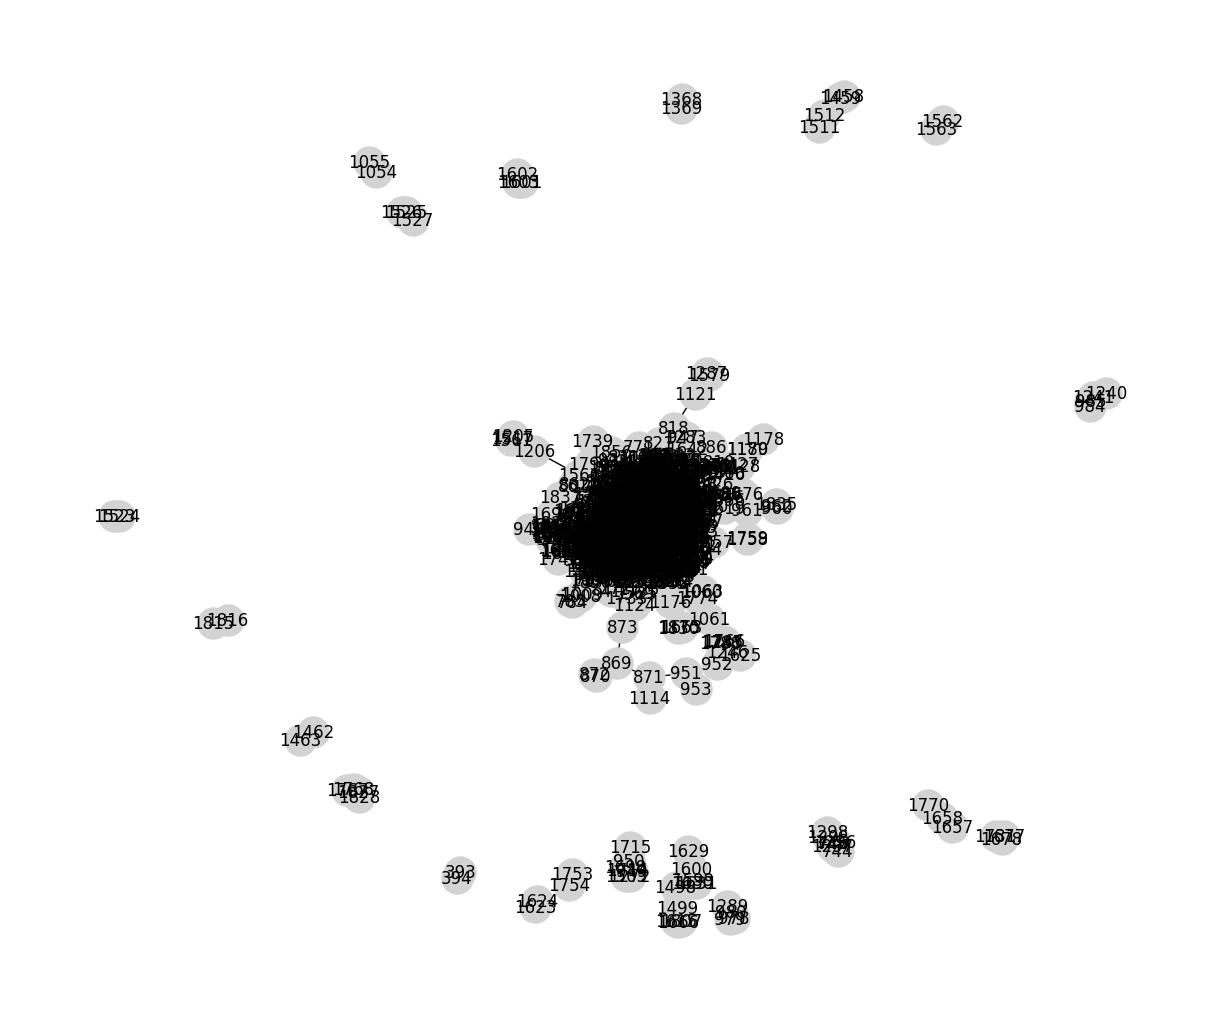

In [17]:
G= G=nx.read_edgelist("hamsterster.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [18]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [19]:
# Calculando a menor distância média

if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Menor distância média:", round(l, 2))
else:
    print("O grafo tem mais do que ema componente conectada")

Menor distância média: 3.45


In [8]:
# Calculando o diâmetro

d = nx.diameter(G)
print('Diâmetro da rede:', d)

Diâmetro da rede: 14


## **Questão 3:** Calcule o coeficiente de assortatividade para a rede Hamsterster. Considere apenas o maior componente.



In [21]:
# Calculando a assortatividade

r=nx.degree_assortativity_coefficient(G)
print("Assortativity = ", round(r, 3))

Assortativity =  -0.089


# **Questão 2:** Para a rede de aeroportos (base USairport500), calcule a média e variância do comprimento dos menores caminhos. Considere apenas o maior componente na rede.



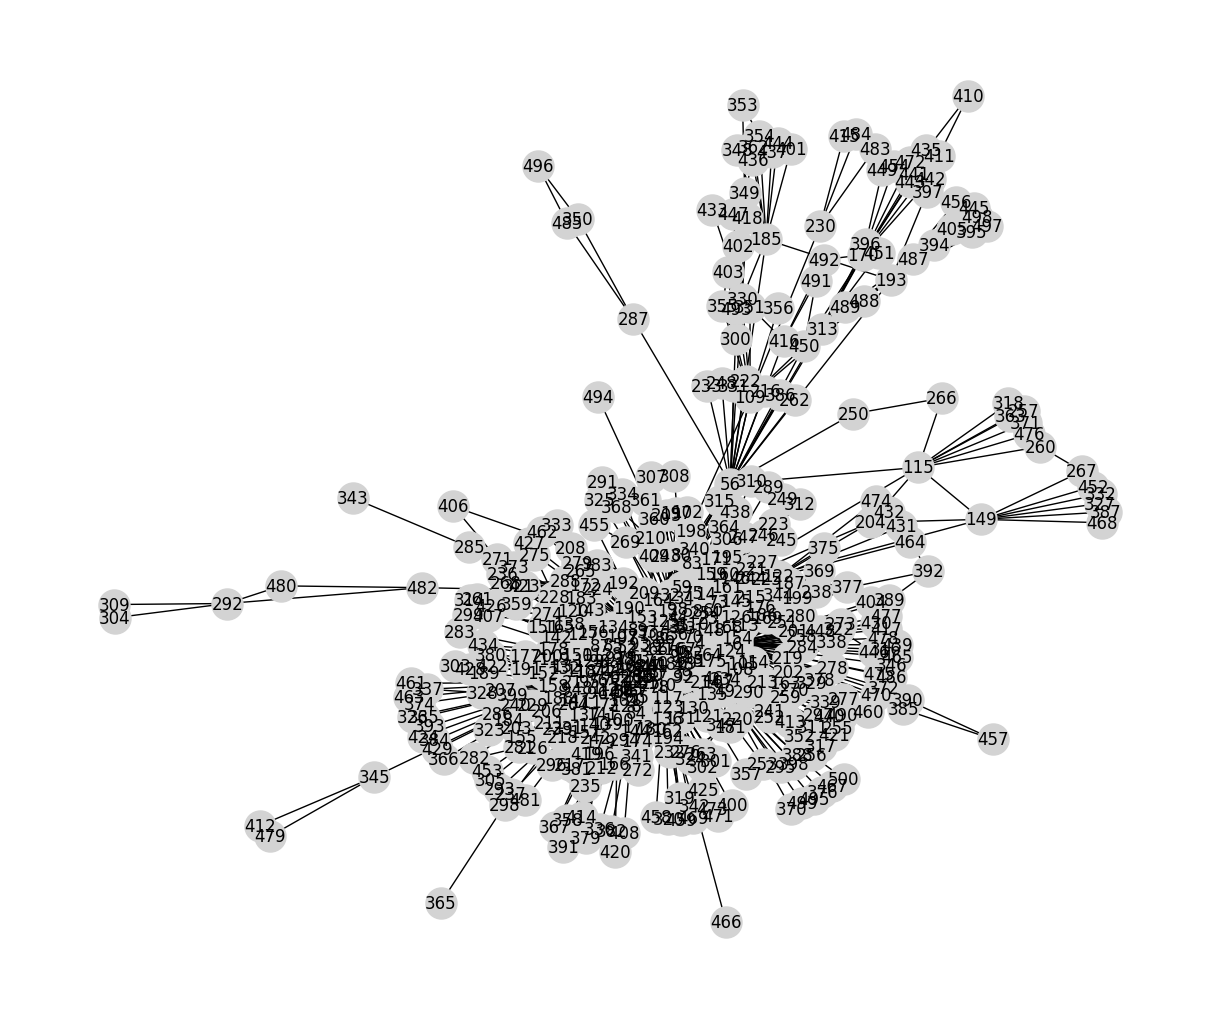

In [22]:
G= G=nx.read_edgelist("USairport500.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [23]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [24]:
if nx.is_connected(G):
    path_lengths = dict(nx.all_pairs_shortest_path_length(G))  # Obtém todos os caminhos mais curtos
    all_distances = []

    for source in path_lengths:
        for target in path_lengths[source]:
            if source != target:  # Evita incluir distância para si mesmo (0)
                all_distances.append(path_lengths[source][target])

    mean_distance = np.mean(all_distances)
    variance_distance = np.var(all_distances, ddof=0)  # Variância populacional

    print("Menor distância média:", round(mean_distance, 2))
    print("Variância da distância média:", round(variance_distance, 2))

else:
    print("O grafo tem mais do que uma componente conectada")


Menor distância média: 2.99
Variância da distância média: 0.82


# **Questão 4:** Para a rede de aeroportos (USairport500), calcule a entropia de Shannon considerando o comprimento dos menores caminhos. Use o logaritmo na base 2 e considere apenas o maior componente.

In [31]:
def shannon_entropy_shortest_paths(G):
    # Seleciona apenas a maior componente conectada
    if not nx.is_connected(G):
        G = max(nx.connected_components(G), key=len)
        G = G.subgraph(G).copy()

    # Obtém todas as distâncias entre pares de nós
    path_lengths = dict(nx.all_pairs_shortest_path_length(G))

    all_distances = []
    for source in path_lengths:
        for target in path_lengths[source]:
            if source != target:  # Evita distâncias triviais (0)
                all_distances.append(path_lengths[source][target])

    # Frequência relativa dos comprimentos dos caminhos mais curtos
    unique, counts = np.unique(all_distances, return_counts=True)
    Pk = counts / sum(counts)  # Probabilidade de cada distância

    # Calcula a entropia de Shannon
    H = -np.sum(Pk * np.log2(Pk))

    return H

H = shannon_entropy_shortest_paths(G)
print("Entropia de Shannon =", round(H, 2))

Entropia de Shannon = 1.88


# **Questão 5:** Calcule o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau para a rede de palavras (word_adjacencies). Considere apenas o maior componente conectado.

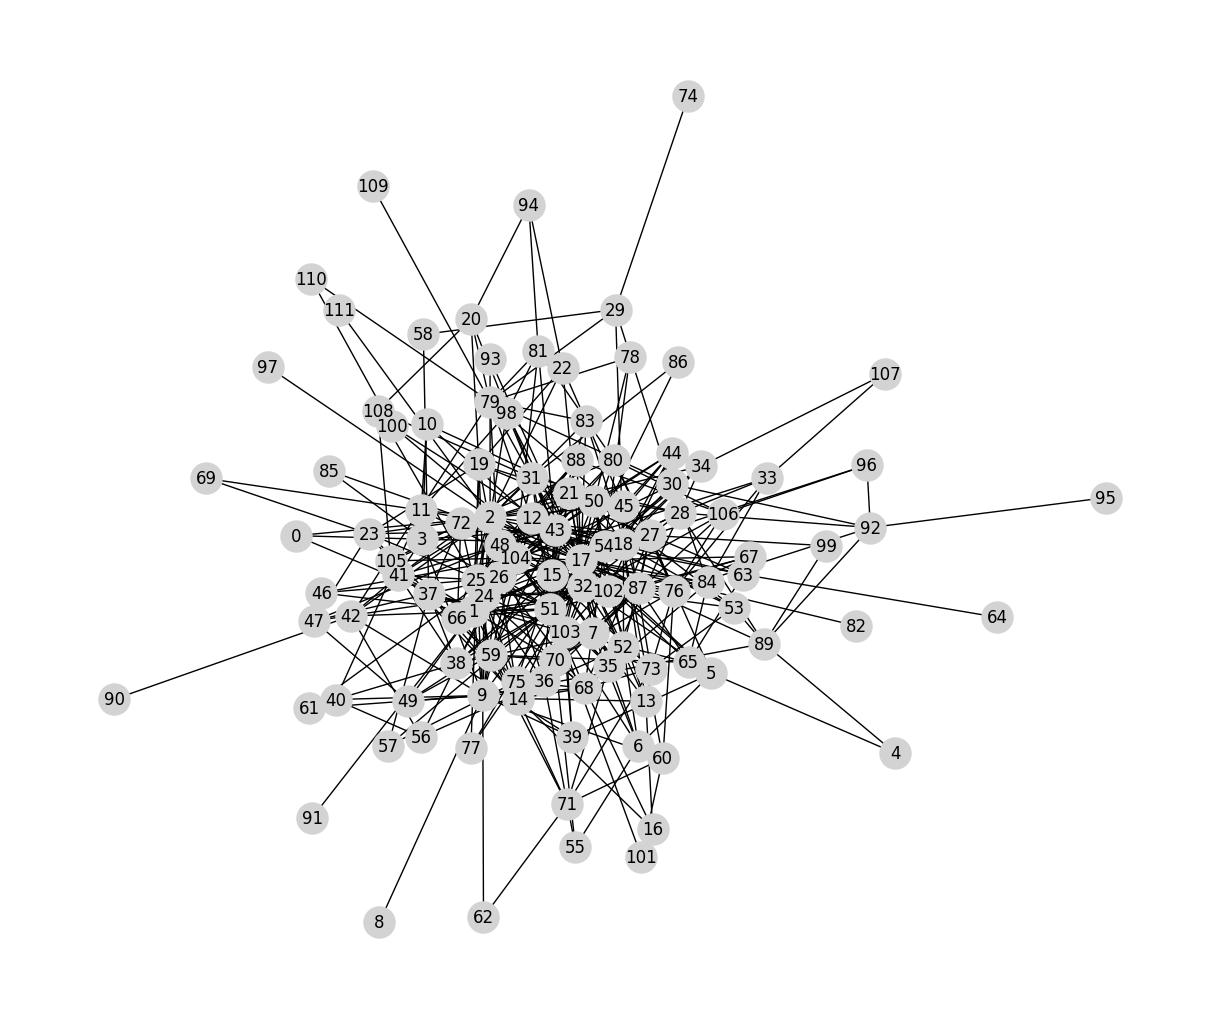

In [39]:
G= G=nx.read_edgelist("word_adjacencies.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [40]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [41]:
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)

print("Grau médio  dos vizinhos:", "%3.2f"%mean(knn))

Grau médio  dos vizinhos: 14.76


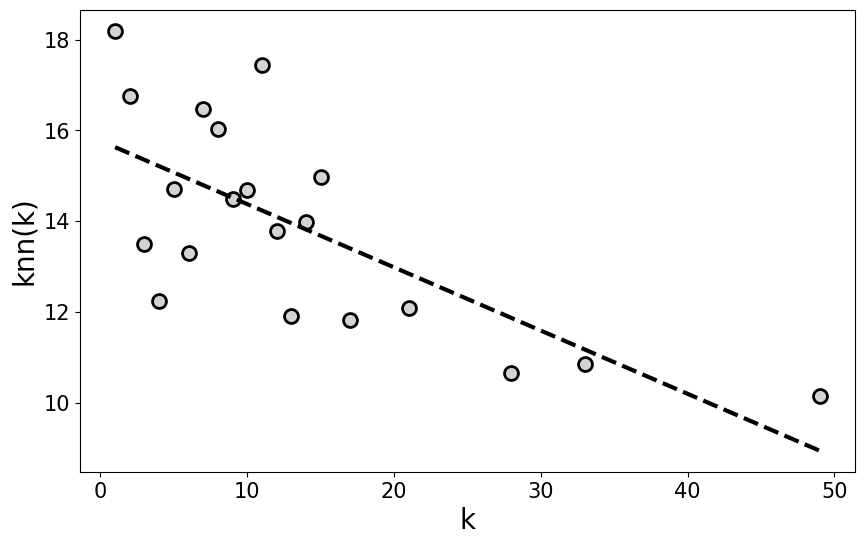

In [43]:
# Obtendo os graus dos nós
vk = dict(G.degree())
vk = np.array(list(vk.values()))  # Convertendo para array NumPy

knnk = []
ks = []

# Calculando knn(k) para cada grau único
for k in np.arange(np.min(vk), np.max(vk) + 1):
    aux = np.where(vk == k)[0]  # Obtém índices dos nós com grau k
    if len(aux) > 0:
        av_knn = np.mean(knn[aux])  # Média da conectividade entre os nós com grau k
        knnk.append(av_knn)
        ks.append(k)

# Criando a figura
fig = plt.figure(figsize=(10, 6))

plt.plot(ks, knnk, '-o', color='gray', markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)

plt.ylabel("knn(k)", fontsize=20)
plt.xlabel("k", fontsize=20)

# Ajuste de reta
par = np.polyfit(ks, knnk, 1, full=True)
slope, intercept = par[0]
xl = [min(ks), max(ks)]
yl = [slope * xx + intercept for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('knn.eps')  # Salvando a figura
plt.show()

In [45]:
rho = corrcoef(ks, knnk)[0,1]
print('Correlação de Pearson:', round(rho,2))

Correlação de Pearson: -0.71
